In [2]:
# inmportation du dataset
from sklearn import datasets
irisData = datasets.load_iris()

In [2]:
irisData.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### <font color=blue >Jeu de données :</font>
- Pour mieux visualiser le jeu de données on peut utiliser les dataframes: une structure de données de la bibliothéque pandas permettant de faciliter la manipulation des données dans un dataset.


In [3]:
import pandas as pd
df_feature = pd.DataFrame(irisData.data, columns=irisData.feature_names)
df_target = pd.DataFrame(irisData.target, columns=['label'])

In [ ]:
# ON affiche les 5 premiéres lignes pour voir la répartition des données dans les tableaux
df_feature.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_target.head()

,label
0,0
1,0
2,0
3,0
4,0


In [7]:
# Nombre des classes 
labels = list(irisData.target_names)
labels

['setosa', 'versicolor', 'virginica']

# Nombre de Données par classes


In [6]:
# NOmbre des données pour chaque classe
df_target['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

# Attribut 32

In [5]:
# Attribut de la 32'éme élement
df_feature.iloc[32,:]

sepal length (cm)    5.2
sepal width (cm)     4.1
petal length (cm)    1.5
petal width (cm)     0.1
Name: 32, dtype: float64

# Commenting Function

In [10]:
import matplotlib # import library
from itertools import cycle # définir les couleurs de la présentation
import seaborn as sns # pour améliorer la visualisation
import numpy as np
import pylab as pl
def plot_2D(data, target, target_names, x1, x2, with_line = False, a = None ,b = None): 
    
  # On modifie la fonction pour prendre en considération l'attrivut X1 et X2
  colors = cycle('rgbcmykw') # cycle de couleurs
  target_ids = range(len(target_names)) # les identifiants de chaque target
  pl.figure()
  for i, c, label in zip(target_ids, colors, target_names):
    pl.scatter(data[target == i, x1], data[target == i, x2], c=c, label=label)
    pl.xlabel(df_feature.columns[x1])
    pl.ylabel(df_feature.columns[x2])
    pl.title(df_feature.columns[x1] + ' VS ' + df_feature.columns[x2])
  if with_line:
    pl.plot([0.0,7.0], a * np.array([0.0,7.0]) + b)
  pl.legend()
  pl.show()

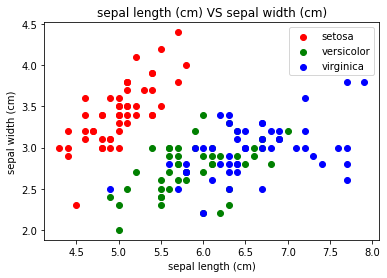

In [11]:
plot_2D(irisData.data,irisData.target,labels, 0, 1)

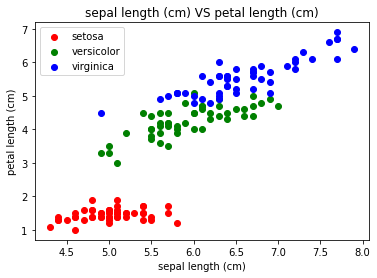

In [12]:
plot_2D(irisData.data,irisData.target,labels, 0, 2)

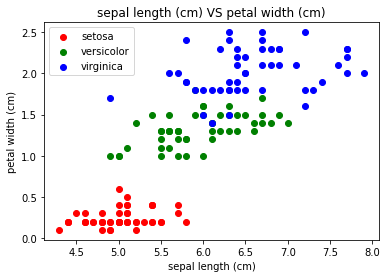

In [13]:
plot_2D(irisData.data,irisData.target,labels, 0, 3)

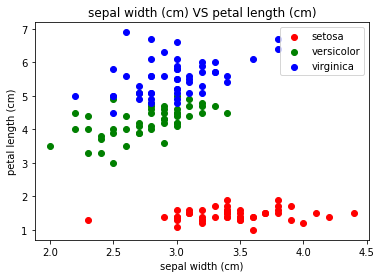

In [14]:
plot_2D(irisData.data,irisData.target,labels, 1, 2)

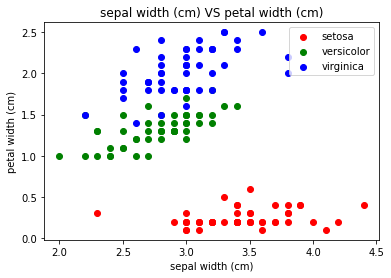

In [15]:
plot_2D(irisData.data,irisData.target,labels, 1, 3)

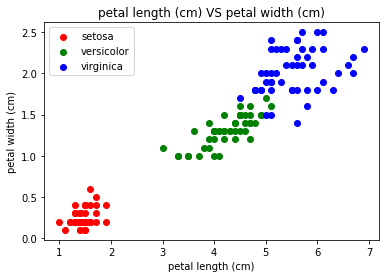

In [ ]:
plot_2D(irisData.data,irisData.target,labels, 2, 3)

Oui il existe une droite permettant de séparer la classe de setosa et les deux autres classes.

y =  -2X + 1.5


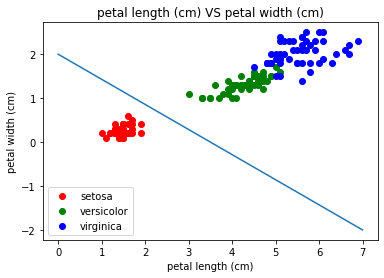

In [16]:
plot_2D(irisData.data,irisData.target,labels, 2, 3, True, -(2/3.5), 2)

# naive_bayes

In [5]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
irisData = datasets.load_iris()
nb.fit(irisData.data[:-1], irisData.target[:-1])# training the model on the iris dataset
p31 = nb.predict([irisData.data[31]]) # Predicting the class of the row 32
print(p31)
plast = nb.predict([irisData.data[-1]]) # Predicting the class of the last row
print(plast)
p = nb.predict(irisData.data[:]) # Prediction all the data
print(p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### <font color= blue> Interpretation</font>
- Dans la cellule ci-dessus on fait l'apprentissage sur tout le dataset puis on test sur tout le dataset, ceci peut provoquer des problémes d'overfit et des interpretations non significatifs.


In [6]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
nb.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

### <font color= blue> Interpretation</font>
- Dans ce casn le modéle apprit a partir des 100 premiéres lignes et prédit les 50 derniéres lignes, le modéle ne connait pas donc l'existance de la classe 2 et donc il donne une mauvaise prédiction <font color =red >sur tout l'ensemble du test.</font>
- On doit diviser les données en training et test en prenant le même nombre de chaque classe

# Evaluation des performances :

In [7]:
from sklearn.model_selection import train_test_split
nb.fit(irisData.data,irisData.target)

MultinomialNB()

In [10]:
ea = 0
P = nb.predict(irisData.data)
Y = irisData.target
for i in range(len(irisData.data)):
    if P[i] != Y[i]:
        ea = ea+1
print(ea/len(irisData.data))
diff = P - Y

0.04666666666666667


### <font color= blue> Interpretation</font>
- On fait la prédiction sur tout le dataset et on calcule l'erreur, l'erreur est de 0.333333, donc le modéle n'arrive pas a prédire 1/3 de l'ensemble de donnée.


# Comptage en une seule ligne

In [11]:
import numpy as np

In [15]:
non_zero = np.sum(diff != 0)
non_zero/150

0.04666666666666667

### <font color= blue> Interpretation</font>
- Les valeurs non nulles présentent les lignes ou les valeurs prédites sont differentes des valeurs réeles, donc une erreur.
dans ce cas on a 50 valeurs non nulles , donc 1/3 de l'ensemble du test.
- on peut voir le taux de bon prédiction en utilisant le score.

In [13]:
nb.score(irisData.data, irisData.target)

0.9533333333333334

# Performance en géneralisation


In [14]:
X = irisData.data
y= irisData.target

In [23]:
from random import shuffle #shuffle pour changer la répartition des données.

In [31]:
def shuffle_split_data(X, y, percentage = 80):
    arr_rand = np.random.rand(X.shape[0]) 
    # arr_rand va contenir un tableau de meme nombre de ligne que X contenant des valeurs aléatoires
    split = arr_rand < np.percentile(arr_rand, percentage)
    # Split va contenir des valeurs booleans indiquant si la ligne appartient a l'ensemble du train ou non
    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]
    return X_train, y_train, X_test, y_test

In [32]:
X_train , y_train , X_test, y_test = shuffle_split_data(X,y, 66)

###  <font color = blue >Interpretation</font>
la fonction shuffle_split_data permet de diviser l'ensemble de données en un ensemble du train et un ensemble du test en prenant en considération la répartition passé dans la variable percentage.

In [34]:
def test(X,y , model , train_size = 66):
  X_train , y_train , X_test, y_test = shuffle_split_data(X,y, train_size)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score  = model.score(X_test, y_test)
  return 1 - score


In [37]:
naive_bayes_model = naive_bayes.MultinomialNB(fit_prior=True)
erreur1 = test(X,y , naive_bayes_model)
erreur1 

0.0980392156862745

### <font color = blue > Interpretation</font>
L'erreur est trés inferieur a l'erreur trouvé précedement, cette valeur change en répetant l'éxecution du code.

In [100]:
tableau = {}
t1=[]
for t in [10, 50, 200, 500, 1000]:
  error = 0
  for i in range(t):
    naive_bayes_model = naive_bayes.MultinomialNB(fit_prior=True)
    error += test(X,y , naive_bayes_model)
  step = f"t{t}"
  tableau[step] = error/t
  t1.append(error/t)
tableau

{'t10': 0.18039215686274512,
 't1000': 0.20382352941176562,
 't200': 0.2211764705882354,
 't50': 0.1949019607843137,
 't500': 0.19850980392156933}

### <font color = blue > Interpretation</font>
- en répetant le test 10 fois on obtient une erreur de 0.13, si on répete le test pour un nombre suppérieur a 50 l'erreur donne : 0.20

In [101]:
tableau1 = {}
t2=[]
for t in [10, 50, 200, 500, 1000]:
  error = 0
  for i in range(t):
    naive_bayes_model = naive_bayes.MultinomialNB(fit_prior=True)
    error += test(X,y , naive_bayes_model, 90)
  step = f"t{t}"
  tableau1[step] = error/t
  t2.append(error/t)
tableau1

{'t10': 0.039999999999999994,
 't1000': 0.12273333333333364,
 't200': 0.14399999999999977,
 't50': 0.15199999999999997,
 't500': 0.1168000000000004}

### <font color = blue > Interpretation</font>
- Si on change la répartition du set en 90 / 10 on obtient une erreur plus faible.

In [102]:
from sklearn.model_selection import train_test_split


In [103]:
def test_v2(X,y , model , test_size = 0.2):
  X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=test_size)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score  = model.score(X_test, y_test)
  return 1 - score

In [104]:
tableau2 = {}
t3=[]
error = 0
for t in [0.1, 0.15, 0.2, 0.25, 0.33]:
  error = 0
  naive_bayes_model = naive_bayes.MultinomialNB(fit_prior=True)
  error = test_v2(X,y , naive_bayes_model, t)
  test_size = f"error-->test_size({t})"
  tableau2[test_size] = error
  t3.append(error)
tableau2

{'error-->test_size(0.1)': 0.2666666666666667,
 'error-->test_size(0.15)': 0.3913043478260869,
 'error-->test_size(0.2)': 0.033333333333333326,
 'error-->test_size(0.25)': 0.1578947368421053,
 'error-->test_size(0.33)': 0.4}

### <font color = blue > Interpretation</font>
- On remarque qe l'erreur réel sur le test de taille 1/3 est de 0.4.

In [105]:
from sklearn.model_selection import cross_validate


In [106]:
def test_v3(X,y , model , folds):
  results = cross_validate(model, X, y, cv=folds)

  return 1 -  results['test_score'].mean()

In [107]:
tableau3 = {}
t4=[]
for folds in [2,3,5,8,10]:
  naive_bayes_model = naive_bayes.MultinomialNB(fit_prior=True)
  error = test_v3(X,y,naive_bayes_model,folds)
  nb_folds = f"error-->nb_folds({folds})"
  tableau3[nb_folds] = error
  t4.append(error)
tableau3

{'error-->nb_folds(10)': 0.046666666666666634,
 'error-->nb_folds(2)': 0.046666666666666634,
 'error-->nb_folds(3)': 0.053333333333333344,
 'error-->nb_folds(5)': 0.046666666666666634,
 'error-->nb_folds(8)': 0.05263157894736836}

### <font color = blue > Interpretation</font>
- On remarque qe l'erreur réel sur le test set en utilisant crossvalidation est de 0.04.

In [108]:
results = pd.DataFrame({'Results':['erreur1','executing test 10 times','executing test 50 times','executing test 200 times','executing test 500 times','executing test 1000 times','executing test2 10 times','t2 50','t2 200','t2 500'
                                            ,'t2 1000',' split = 0.1', 'split = 0.15','split = 0.2', 'split = 0.25', 'split = 0.33','folds = 2','folds = 3','folds = 8','folds = 5','folds = 10']})
results


,Results
0,erreur1
1,executing test 10 times
2,executing test 50 times
3,executing test 200 times
4,executing test 500 times
5,executing test 1000 times
6,executing test2 10 times
7,t2 50
8,t2 200
9,t2 500


In [109]:
first_model_results = []
first_model_results = np.append(first_model_results,erreur1)
first_model_results = np.append(first_model_results,t1)
first_model_results = np.append(first_model_results,t2)
first_model_results = np.append(first_model_results,t3)
first_model_results = np.append(first_model_results,t4)
first_model = pd.DataFrame({'sklearn Naive bayes':first_model_results})

In [110]:
results = results.join(first_model) 
results

,Results,sklearn Naive bayes
0,erreur1,0.098039
1,executing test 10 times,0.180392
2,executing test 50 times,0.194902
3,executing test 200 times,0.221176
4,executing test 500 times,0.198510
5,executing test 1000 times,0.203824
6,executing test2 10 times,0.040000
7,t2 50,0.152000
8,t2 200,0.144000
9,t2 500,0.116800


In [111]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
erreur2 = test(X,y , clf)
erreur2

0.05882352941176472

In [112]:
tableau = {}
t1=[]
for t in [10, 50, 200, 500, 1000]:
  error = 0
  for i in range(t):
    clf = tree.DecisionTreeClassifier()
    error += test(X,y , clf)
  step = f"t{t}"
  tableau[step] = error/t
  t1.append(error/t)
tableau1 = {}
t2=[]
for t in [10, 50, 200, 500, 1000]:
  error = 0
  for i in range(t):
    clf = tree.DecisionTreeClassifier()
    error += test(X,y , clf, 90)
  step = f"t{t}"
  tableau1[step] = error/t
  t2.append(error/t)
tableau2 = {}
t3=[]
error = 0
for t in [0.1, 0.15, 0.2, 0.25, 0.33]:
  error = 0
  clf = tree.DecisionTreeClassifier()
  error = test_v2(X,y , clf, t)
  test_size = f"error-->test_size({t})"
  tableau2[test_size] = error
  t3.append(error)
tableau3 = {}
t4=[]
for folds in [2,3,5,8,10]:
  naive_bayes_model = naive_bayes.MultinomialNB(fit_prior=True)
  error = test_v3(X,y,naive_bayes_model,folds)
  nb_folds = f"error-->nb_folds({folds})"
  tableau3[nb_folds] = error
  t4.append(error)
second_model_results = []
second_model_results = np.append(second_model_results,erreur2)
second_model_results = np.append(second_model_results,t1)
second_model_results = np.append(second_model_results,t2)
second_model_results = np.append(second_model_results,t3)
second_model_results = np.append(second_model_results,t4)
second_model = pd.DataFrame({'sklearn  Decision Trees':second_model_results})



In [113]:
results = results.join(second_model) 
results

,Results,sklearn Naive bayes,sklearn Decision Trees
0,erreur1,0.098039,0.058824
1,executing test 10 times,0.180392,0.049020
2,executing test 50 times,0.194902,0.050588
3,executing test 200 times,0.221176,0.057255
4,executing test 500 times,0.198510,0.053333
5,executing test 1000 times,0.203824,0.054020
6,executing test2 10 times,0.040000,0.080000
7,t2 50,0.152000,0.053333
8,t2 200,0.144000,0.051333
9,t2 500,0.116800,0.054133


### <font color = blue > Interpretation</font>
- On remarque que le modéle des arbres de décision donne des meilleur résultats pour tous les types de test, donc le modéle des arbres de décisions est le plus adéquate pour la classification des fleurs d'Iris.